## Student Performance Indicator

### 1) Problem Statement

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preaparation course. 

### 2) Import Data and Required Packages
2.1 Importing Pandas, Numpy, Matplotlib, Seaborn and Warning Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

2.2 Import CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

2.3 Show top 5 records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


2.4 Shape of the Dataset

In [4]:
df.shape

(1000, 8)

### 3) Data Checks to Perform
<ul>
  <li>Check Missing values</li>
  <li>Check Duplicates</li>
  <li>Check Data type</li>
  <li>Check number of unique values of each column</li>
  <li>Check statistics of dataset</li>
  <li>Check various categories present in the different categorical columns</li>
</ul>

#### 3.1 Check Missing values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values present in the dataset.

#### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

There are no duplicates present in the dataset.

#### 3.3 Check data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Check statistics of data set

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insites
<ul>
    <li>From the above description of numberic data, all means are very close to each other - between 66 to 69.17</li>
    <li>All standard deviations are also close - between 14.6 to 15.19</li>
    <li>While there is a minimum score 0 for math, 17 for reading and 10 for writing.</li>
</ul>

#### 3.6 Check various categories present in the different categorical columns

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O' ]
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O' ]

print(f"We have {len(numerical_features)} numerical features: {numerical_features}")
print(f"We have {len(categorical_features)} categorical features: {categorical_features}")

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [12]:
print("Categories in gender column:")
print(df['gender'].unique())

print("\nCategories in race ethnicity column:")
print(df['race_ethnicity'].unique())

print("\nCategories in parental level of education column:")
print(df['parental_level_of_education'].unique())

print("\nCategories in lunch column:")
print(df['lunch'].unique())

print("\nCategories in test preparation course column:")
print(df['test_preparation_course'].unique())

Categories in gender column:
['female' 'male']

Categories in race ethnicity column:
['group B' 'group C' 'group A' 'group D' 'group E']

Categories in parental level of education column:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in lunch column:
['standard' 'free/reduced']

Categories in test preparation course column:
['none' 'completed']


#### 3.7 Adding columns for "Total Score" and "Average"

In [13]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
df["total_score"] = df["math_score"]+df["reading_score"]+df["writing_score"]
df["average_score"] = df["total_score"]/3
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


#### 3.8 Finding number of students with max marks and min marks.

In [15]:
math_full = df[df["math_score"] == 100]["math_score"].count()
reading_full = df[df["reading_score"] == 100]["reading_score"].count()
writing_full = df[df["writing_score"] == 100]["writing_score"].count()

print(f"Number of students with full marks in Maths:{math_full}")
print(f"Number of students with full marks in Reading:{reading_full}")
print(f"Number of students with full marks in Writing:{writing_full}")


Number of students with full marks in Maths:7
Number of students with full marks in Reading:17
Number of students with full marks in Writing:14


In [16]:
math_less_20 = df[df["math_score"] <= 20]["math_score"].count()
reading_less_20 = df[df["reading_score"] <= 20]["reading_score"].count()
writing_less_20 = df[df["writing_score"] <= 20]["writing_score"].count()

print(f"Number of students with less than 20 marks in Maths:{math_less_20}")
print(f"Number of students with less than 20 marks in Reading:{reading_less_20}")
print(f"Number of students with less than 20 marks in Writing:{writing_less_20}")

Number of students with less than 20 marks in Maths:4
Number of students with less than 20 marks in Reading:1
Number of students with less than 20 marks in Writing:3


#### Insights
<ul>
    <li>From the above values we got to know that students performed worst in Maths.</li>
    <li>From the above values we got to know that students performed best in Reading.</li>
</ul>


### 4) Exploring Data(Visualization)

#### 4.1 Visualize average score distribution to make some conclusion.
<ul>
    <li>Histogram</li>
    <li>Kernal Distribution Function</li>
</ul>

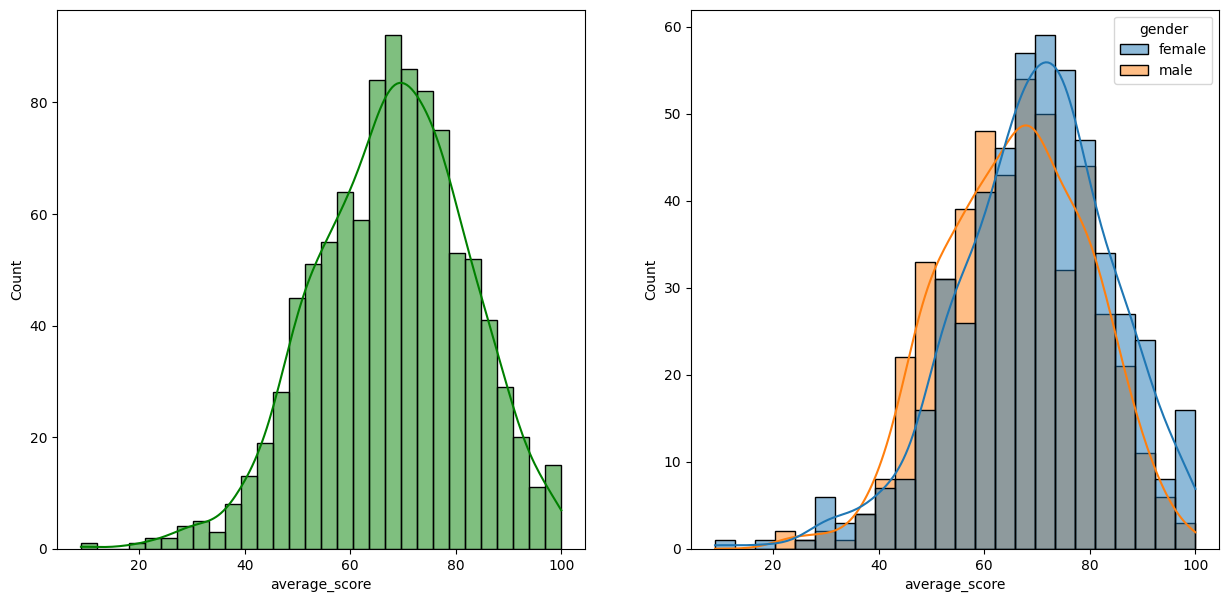

In [17]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

#### Insights
<ul>
    <li>Female students performed well when compared to male students.</li>
</ul>

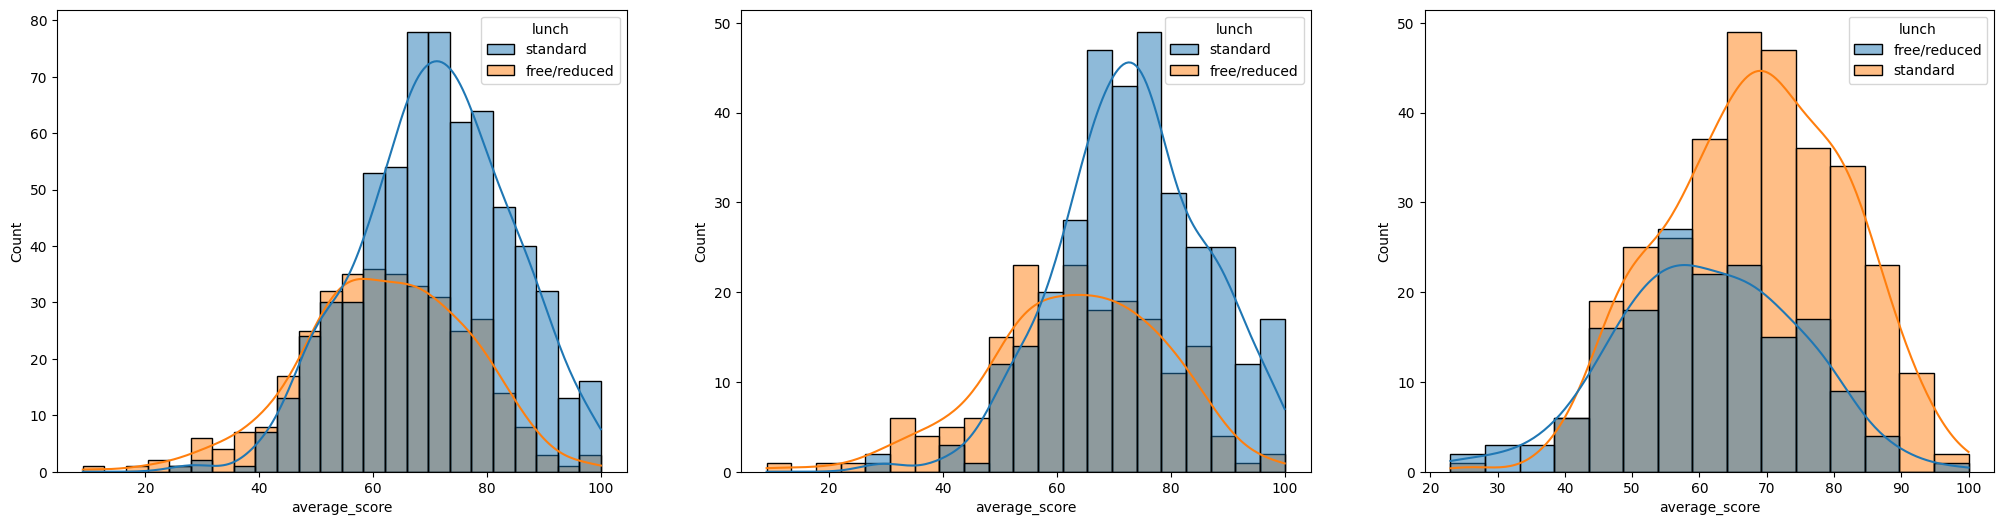

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

#### Insights
<ul>
    <li>Standard lunch helps perform well in exams irrespective to the gender.</li>
</ul>

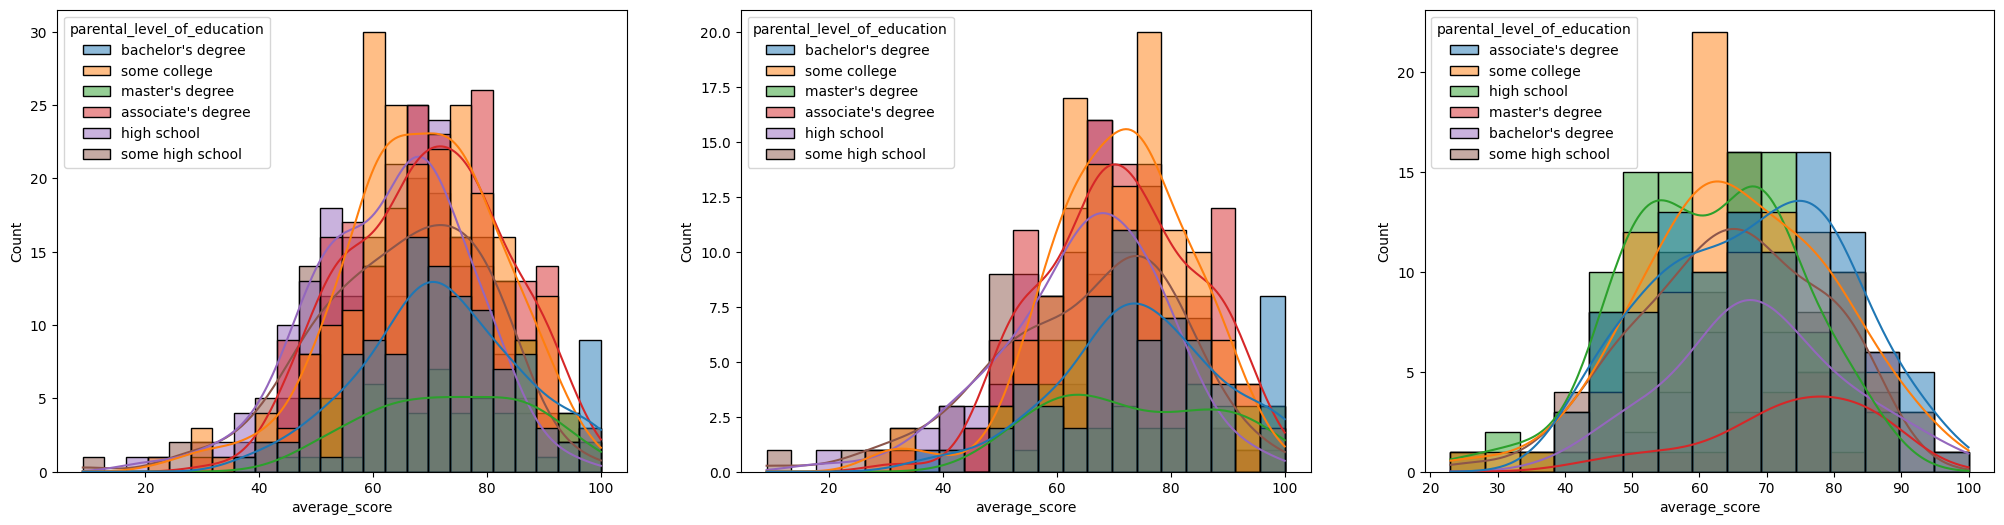

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average_score', kde=True, hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='parental_level_of_education')
plt.show()

#### Insights
<ul>
    <li>In general parent's education don't help student perform well in exam.</li>
    <li>2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam.</li>
    <li>3rd plot we can see there is no effect of parent's education on female students.</li>
</ul>

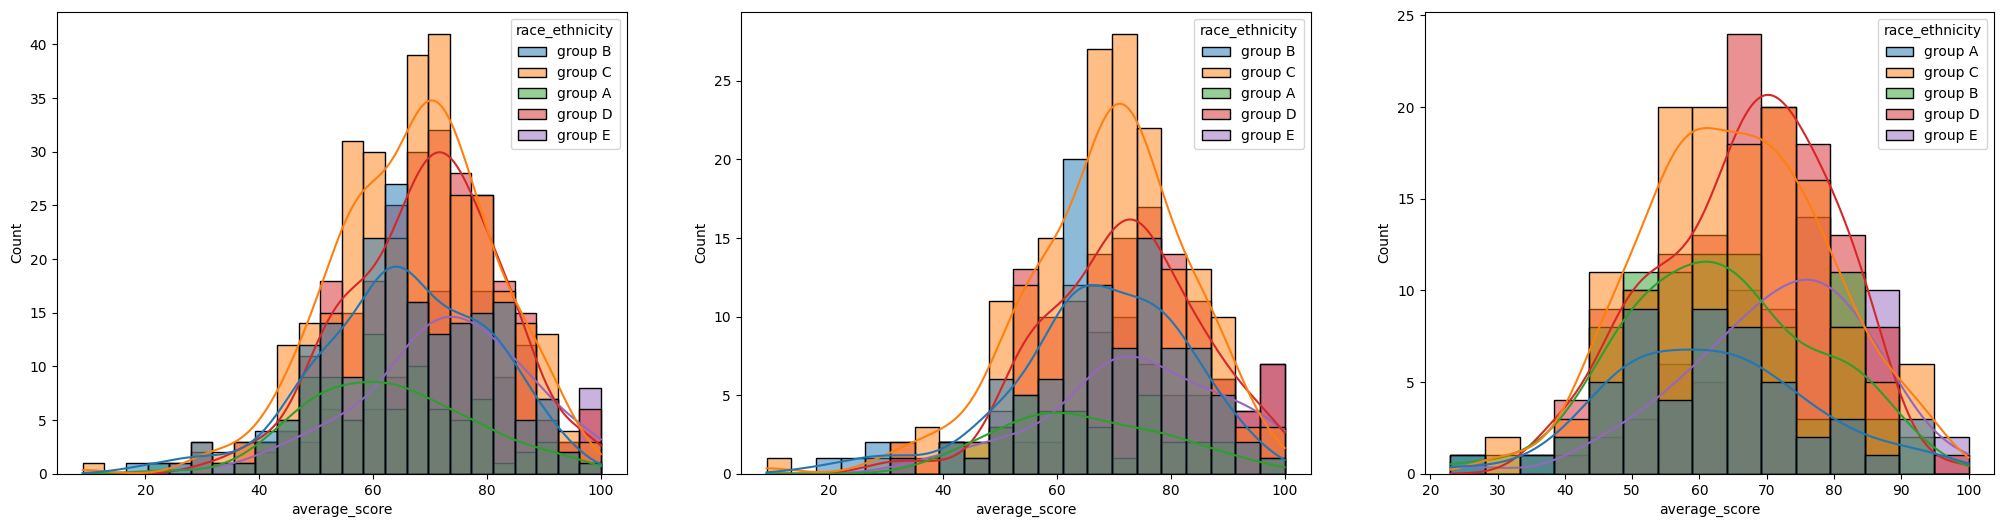

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax=sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax=sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax=sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

#### Insights
<ul>
    <li>Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female</li>
</ul>

#### 4.2 Maximum score of students in all three subjects

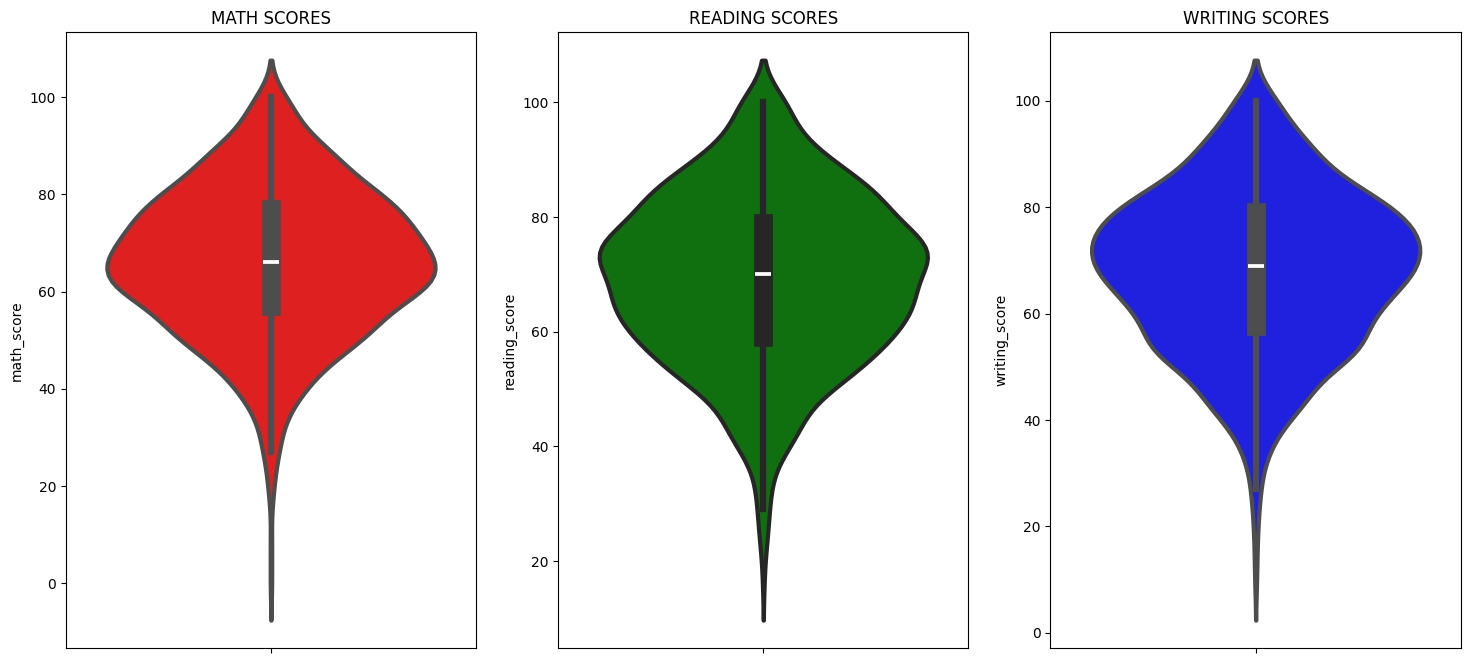

In [21]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,3,2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1,3,3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()


#### Insights
<ul>
    <li>From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80</li>
</ul>